In [42]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.filterwarnings("ignore")

In [43]:
# load data
path = 'BRCA.csv'
df = pd.read_csv(path)

In [44]:
df.shape

(341, 16)

In [45]:
# inspact dataframe
pd.set_option('display.max_columns', None)
df.head(10)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.547150,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.614470,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.327470,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.193040,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.520450,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
5,TCGA-AO-A1KQ,84.0,MALE,-0.081872,1.72410,-0.057335,0.043025,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,18-Sep-17,15-Nov-21,Alive
6,TCGA-D8-A73X,53.0,FEMALE,-0.069535,1.41830,-0.361050,0.391580,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,04-Feb-17,07-Feb-18,Alive
7,TCGA-A7-A426,50.0,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
8,TCGA-EW-A1P5,77.0,FEMALE,-0.151750,-0.66332,1.189400,0.217180,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,28-Sep-17,28-Sep-18,Alive
9,TCGA-A8-A09A,40.0,FEMALE,-0.565700,1.26680,-0.293460,0.193950,II,Infiltrating Lobular Carcinoma,Positive,Positive,Positive,Other,14-Feb-17,15-Dec-17,Alive


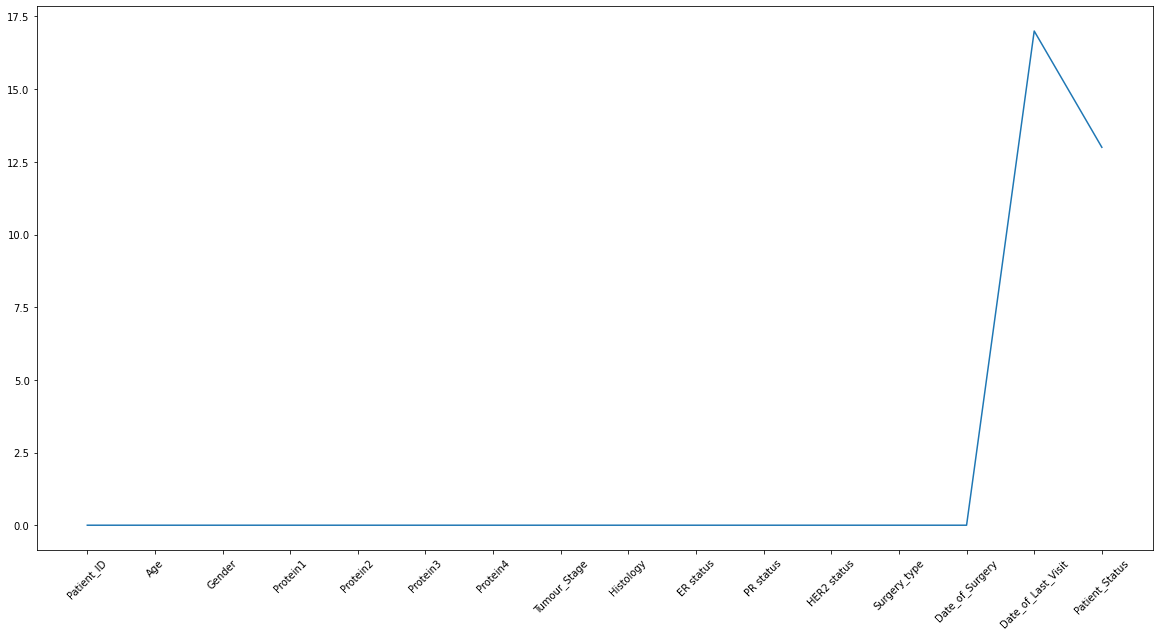

In [46]:
# --- check data quality ---
df = df.dropna(how='all') # delete rows contain only nulls

missing = df.isnull().sum()
index, values = missing.index, missing.values

plt.figure(figsize=(20,10))
plt.xticks(rotation = 45)
sns.lineplot(x=index, y=values);

In [47]:
# We noticed that only Date_of_Surgery and Patient_Status have nulls
# Since there are not many nulls, I will delete those rows
df = df.dropna()

In [48]:
# check duplicates
df.duplicated().sum() # 0

0

In [49]:
# --- clean data ---
list(df.columns) # check column names

['Patient_ID',
 'Age',
 'Gender',
 'Protein1',
 'Protein2',
 'Protein3',
 'Protein4',
 'Tumour_Stage',
 'Histology',
 'ER status',
 'PR status',
 'HER2 status',
 'Surgery_type',
 'Date_of_Surgery',
 'Date_of_Last_Visit',
 'Patient_Status']

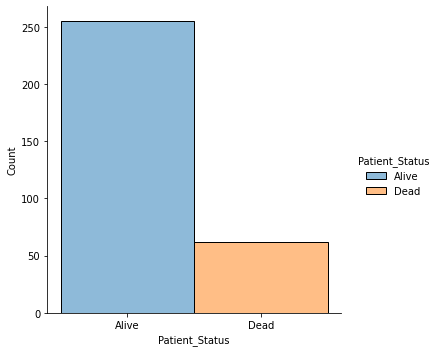

In [50]:
# check the distribution of class
sns.displot(data=df, x = "Patient_Status", hue="Patient_Status");

## Precrocessing

### Encoding

In [51]:
# onehot encoding on gender variable
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [52]:
# one hot encoding on Tumour_Stage
df = pd.get_dummies(df, columns=['Tumour_Stage'], drop_first=True)

In [53]:
# let's look at histology
df['Histology'].nunique() # 3
# then encode it
df = pd.get_dummies(df, columns=['Histology'], drop_first=True)

In [54]:
# check unique values for ER status
df['ER status'].value_counts() # it only contains positive

In [55]:
# check unique values for PR status
df['PR status'].value_counts() # it only contains positive too

In [56]:
# how about HER2 status?
df['HER2 status'].value_counts() # ok we can encode this one

df = pd.get_dummies(df, columns=['HER2 status'], drop_first=True)

In [57]:
# it is necessary to encode Surgery_type?
df['Surgery_type'].nunique() # it has 4 different values
# then encode it
df = pd.get_dummies(df, columns=['Surgery_type'], drop_first=True)

In [58]:
# date variables will not help us predict, so drop them
df = df.drop(columns=['Date_of_Surgery', 'Date_of_Last_Visit', 'ER status', 'PR status'], axis=1)

In [59]:
# last step: encode target classes
df = pd.get_dummies(df, columns=['Patient_Status'], drop_first=True)

In [60]:
# finally let's look at our data
df.head()

,Patient_ID,Age,Protein1,Protein2,Protein3,Protein4,Gender_MALE,Tumour_Stage_II,Tumour_Stage_III,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,Patient_Status_Dead
0,TCGA-D8-A1XD,36.0,0.080353,0.42638,0.54715,0.273680,0,0,1,0,0,0,1,0,0,0
1,TCGA-EW-A1OX,43.0,-0.420320,0.57807,0.61447,-0.031505,0,1,0,0,1,0,0,0,0,1
2,TCGA-A8-A079,69.0,0.213980,1.31140,-0.32747,-0.234260,0,0,1,0,0,0,0,1,0,0
3,TCGA-D8-A1XR,56.0,0.345090,-0.21147,-0.19304,0.124270,0,1,0,0,0,0,1,0,0,0
4,TCGA-BH-A0BF,56.0,0.221550,1.90680,0.52045,-0.311990,0,1,0,0,0,0,0,1,0,1


In [61]:
r, c = df.shape
print('{} rows and {} columns after encoding'.format(r,c))

317 rows and 16 columns after encoding


### Split data

In [62]:
# features
X = df.drop(columns=['Patient_Status_Dead', 'Patient_ID'], axis=1)
y = df['Patient_Status_Dead']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

### Standardization

In [63]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Modeling

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(penalty='l2', C = 0.1, random_state=1, solver='lbfgs').fit(X_train_std, y_train)

In [65]:
Lr.score(X_train_std, y_train).round(2) # just curious

0.83

In [66]:
y_pred = Lr.predict(X_test_std)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85        72
           1       0.00      0.00      0.00        24

    accuracy                           0.74        96
   macro avg       0.37      0.49      0.43        96
weighted avg       0.56      0.74      0.64        96



### Logistic Regression with LDA

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
pipe_ir = make_pipeline(LinearDiscriminantAnalysis(n_components=1),
                        LogisticRegression(random_state=1,
                                           C = 0.1,
                                           solver='lbfgs'))
pipe_ir.fit(X_train_std, y_train)
y_pred_lr = pipe_ir.predict(X_test_std)

In [68]:
print(classification_report(y_test, y_pred_lr)) # just the same

              precision    recall  f1-score   support

           0       0.75      0.99      0.85        72
           1       0.00      0.00      0.00        24

    accuracy                           0.74        96
   macro avg       0.37      0.49      0.43        96
weighted avg       0.56      0.74      0.64        96



### How About Logistic Regression with PCA

In [69]:
from sklearn.decomposition import PCA
pipe_ir_pca = make_pipeline(PCA(n_components=1),
                        LogisticRegression(random_state=1,
                                           C = 0.1,
                                           solver='lbfgs'))
pipe_ir_pca.fit(X_train_std, y_train)
y_pred_lr_pca = pipe_ir.predict(X_test_std)

In [70]:
print(classification_report(y_test, y_pred_lr_pca)) # just the same

              precision    recall  f1-score   support

           0       0.75      0.99      0.85        72
           1       0.00      0.00      0.00        24

    accuracy                           0.74        96
   macro avg       0.37      0.49      0.43        96
weighted avg       0.56      0.74      0.64        96



I guess we do not need nether PCA or LDA with respect to 15 features

### RandomForest

In [71]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(class_weight='balanced',
                                random_state=0)
forest.fit(X_train, y_train)
y_rf = forest.predict(X_test)

In [72]:
print(classification_report(y_test, y_rf)) # just the same

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        72
           1       0.00      0.00      0.00        24

    accuracy                           0.75        96
   macro avg       0.38      0.50      0.43        96
weighted avg       0.56      0.75      0.64        96



Forest performs better than logistic regression

### Gredient Boosting Classifer

In [73]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
clf = GBC(learning_rate=0.1, random_state=0).fit(X_train_std, y_train)
y_gdc = clf.predict(X_test_std)

In [74]:
print(classification_report(y_test, y_gdc))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84        72
           1       0.25      0.04      0.07        24

    accuracy                           0.73        96
   macro avg       0.50      0.50      0.46        96
weighted avg       0.62      0.73      0.65        96



Not as good as RandomForest in this case

### SVM

In [75]:
from sklearn.svm import SVC
svm = SVC(gamma='auto', C=0.1).fit(X_train_std, y_train)
y_svm = svm.predict(X_test_std)

In [76]:
print(classification_report(y_test, y_svm))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        72
           1       0.00      0.00      0.00        24

    accuracy                           0.75        96
   macro avg       0.38      0.50      0.43        96
weighted avg       0.56      0.75      0.64        96



Svm generates the same result as RandomForest

### Soft Voting

In [77]:
from sklearn.ensemble import VotingClassifier
eclf3 = VotingClassifier(estimators=[
                        ('rf', forest), ('gb', clf), ('lr', Lr)],
                        voting='soft', weights=[2,1,1],
                        flatten_transform=True)

In [78]:
eclf3 = eclf3.fit(X_train_std, y_train)
y_eclf3 = eclf3.predict(X_test_std)

In [79]:
print(classification_report(y_test, y_eclf3))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        72
           1       0.00      0.00      0.00        24

    accuracy                           0.75        96
   macro avg       0.38      0.50      0.43        96
weighted avg       0.56      0.75      0.64        96

